In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#한글깨짐 현상 해결(폰트 설정하기)
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Users/my/Desktop/data/nanum-all/나눔 글꼴/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf').get_name()
rc('font', family=font_name)

In [3]:
health=pd.read_csv('C:/Users/my/Desktop/data/nhis_nhcp_info_20211229.csv',encoding='cp949')
#UnicodeDecodeError"'utf-8' 코덱이 위치 0의 바이트 0xb1을 디코딩할 수 없습니다: 잘못된 시작 바이트"

In [4]:
health.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [5]:
#변수명 바꾸기
health=health.rename(columns={"기준년도":'year',"가입자 일련번호":'id',"시도코드":'sido',"성별코드":'sex',"연령대 코드(5세단위)":'age_group',"신장(5Cm단위)":'height',"체중(5Kg 단위)":'weight',"허리둘레":'waist',"시력(좌)":'sight_l',"시력(우)":'sight_r',"청력(좌)":'hear_l', "청력(우)":'hear_r',
                              "수축기 혈압":'bp_high' ,"이완기 혈압":'bp_lwst' ,"식전혈당(공복혈당)":'blds' ,
                              "총 콜레스테롤":'tot_chole' ,"트리글리세라이드":'trigliserida' ,"HDL 콜레스테롤":'hdl',"LDL 콜레스테롤":'ldl' ,
                              "혈색소":'hmg',"요단백":'orig_prote_cd',"혈청크레아티닌":'creatine',"(혈청지오티)AST":'sqot_ast',"(혈청지오티)ALT":'srpt_alt',"감마 지티피":'g_gpt',"흡연상태":'smk',"음주여부":'drk',"구강검진 수검여부":'hichk_oe_inspec_yn',"치아우식증유무":'crs_yn',"치석":'ttr_yn',"데이터 공개일자":'date_std_dt'}) 

In [6]:
print("\n컬럼별 타입,null값 존재여부")
print(health.info())


컬럼별 타입,null값 존재여부
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   year                1000000 non-null  int64  
 1   id                  1000000 non-null  int64  
 2   sido                1000000 non-null  int64  
 3   sex                 1000000 non-null  int64  
 4   age_group           1000000 non-null  int64  
 5   height              1000000 non-null  int64  
 6   weight              1000000 non-null  int64  
 7   waist               999892 non-null   float64
 8   sight_l             999743 non-null   float64
 9   sight_r             999748 non-null   float64
 10  hear_l              999778 non-null   float64
 11  hear_r              999770 non-null   float64
 12  bp_high             992468 non-null   float64
 13  bp_lwst             992466 non-null   float64
 14  blds                992398 non-null   float64
 1

In [7]:
health.isnull().sum()

year                       0
id                         0
sido                       0
sex                        0
age_group                  0
height                     0
weight                     0
waist                    108
sight_l                  257
sight_r                  252
hear_l                   222
hear_r                   230
bp_high                 7532
bp_lwst                 7534
blds                    7602
tot_chole             597694
trigliserida          597678
hdl                   597685
ldl                   605529
hmg                     7611
orig_prote_cd          12141
creatine                7602
sqot_ast                7601
srpt_alt                7602
g_gpt                   7603
smk                      343
drk                      196
hichk_oe_inspec_yn         0
crs_yn                668617
ttr_yn                668618
date_std_dt                0
dtype: int64

<Axes: >

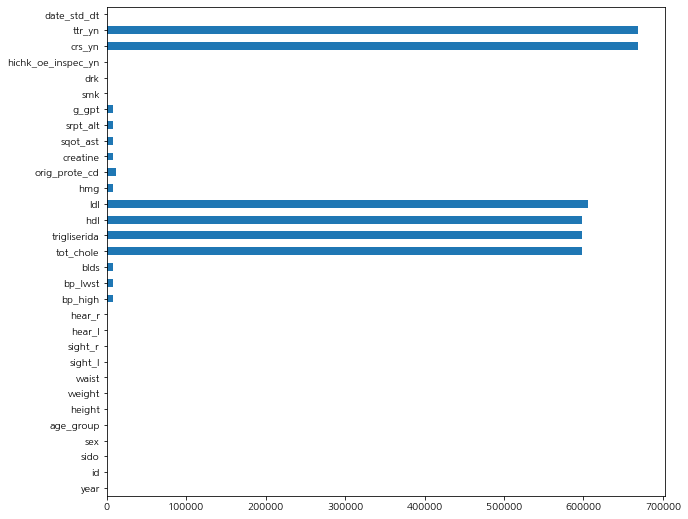

In [8]:
health.isnull().sum().plot.barh(figsize=(10, 9))

In [9]:
print("성별 고유값의 개수")
print(health['sex'].value_counts())
print("\n시도코드 고유값의 개수")
print(health['sido'].value_counts())
print("\n연령대 코드 고유값의 개수")
print(health['age_group'].value_counts().sort_index(ascending=False))

성별 고유값의 개수
1    510689
2    489311
Name: sex, dtype: int64

시도코드 고유값의 개수
41    247369
11    166231
26     69025
48     68530
28     58345
47     54438
27     48413
44     42582
45     38066
46     38041
43     34009
42     32023
30     30057
29     28532
31     26001
49     11878
36      6460
Name: sido, dtype: int64

연령대 코드 고유값의 개수
18      6237
17     23401
16     36663
15     73714
14     86653
13    155096
12    142089
11    175705
10    144165
9     156277
Name: age_group, dtype: int64


In [10]:
print(health['orig_prote_cd'].value_counts())

1.0    914825
2.0     39974
3.0     22219
4.0      7652
5.0      2465
6.0       724
Name: orig_prote_cd, dtype: int64


In [11]:
new = health.iloc[:, 2:-4]
print(new)

        sido  sex  age_group  height  weight  waist  sight_l  sight_r  hear_l  \
0         36    1          9     165      60   72.1      1.2      1.5     1.0   
1         27    2         13     150      65   81.0      0.8      0.8     1.0   
2         11    2         12     155      55   70.0      0.6      0.7     1.0   
3         31    1         13     160      70   90.8      1.0      1.0     1.0   
4         41    2         12     155      50   75.2      1.5      1.2     1.0   
...      ...  ...        ...     ...     ...    ...      ...      ...     ...   
999995    41    2         13     145      55   81.0      0.9      1.0     1.0   
999996    26    2         12     160      55   76.5      1.5      1.5     1.0   
999997    48    1          9     175      70   85.0      1.2      1.2     1.0   
999998    48    2          9     160      70   91.0      0.6      0.5     1.0   
999999    28    1         11     160      55   76.1      2.0      2.0     1.0   

        hear_r  ...   hdl  

# 가. 결측치 및 이상치 처리하기

In [12]:
#전체컬럼에서 3개컬럼(tot_chole, hdl, ldl)이 60%가 결측값으로 제외 
new.dropna(axis=0, inplace=True)
print(new.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392039 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sido           392039 non-null  int64  
 1   sex            392039 non-null  int64  
 2   age_group      392039 non-null  int64  
 3   height         392039 non-null  int64  
 4   weight         392039 non-null  int64  
 5   waist          392039 non-null  float64
 6   sight_l        392039 non-null  float64
 7   sight_r        392039 non-null  float64
 8   hear_l         392039 non-null  float64
 9   hear_r         392039 non-null  float64
 10  bp_high        392039 non-null  float64
 11  bp_lwst        392039 non-null  float64
 12  blds           392039 non-null  float64
 13  tot_chole      392039 non-null  float64
 14  trigliserida   392039 non-null  float64
 15  hdl            392039 non-null  float64
 16  ldl            392039 non-null  float64
 17  hmg            392039 non-nul

In [13]:
# 흡연여부와 음주여부 열의 결측값을 앞 행의 값으로 채우기
new[['smk', 'drk','orig_prote_cd','hear_l', 'hear_r']].fillna(method='ffill',inplace=True)

# 나머지 열의 결측값을 평균값으로 채우기
new = new.fillna(new.mean())
new.isnull().sum()

sido             0
sex              0
age_group        0
height           0
weight           0
waist            0
sight_l          0
sight_r          0
hear_l           0
hear_r           0
bp_high          0
bp_lwst          0
blds             0
tot_chole        0
trigliserida     0
hdl              0
ldl              0
hmg              0
orig_prote_cd    0
creatine         0
sqot_ast         0
srpt_alt         0
g_gpt            0
smk              0
drk              0
dtype: int64

In [14]:
print(health['orig_prote_cd'].value_counts())

1.0    914825
2.0     39974
3.0     22219
4.0      7652
5.0      2465
6.0       724
Name: orig_prote_cd, dtype: int64


In [15]:
new.info()
#결측치를 제거 및 대체값으로 채운 약 39만건정도의 데이터를 사용

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392039 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sido           392039 non-null  int64  
 1   sex            392039 non-null  int64  
 2   age_group      392039 non-null  int64  
 3   height         392039 non-null  int64  
 4   weight         392039 non-null  int64  
 5   waist          392039 non-null  float64
 6   sight_l        392039 non-null  float64
 7   sight_r        392039 non-null  float64
 8   hear_l         392039 non-null  float64
 9   hear_r         392039 non-null  float64
 10  bp_high        392039 non-null  float64
 11  bp_lwst        392039 non-null  float64
 12  blds           392039 non-null  float64
 13  tot_chole      392039 non-null  float64
 14  trigliserida   392039 non-null  float64
 15  hdl            392039 non-null  float64
 16  ldl            392039 non-null  float64
 17  hmg            392039 non-nul

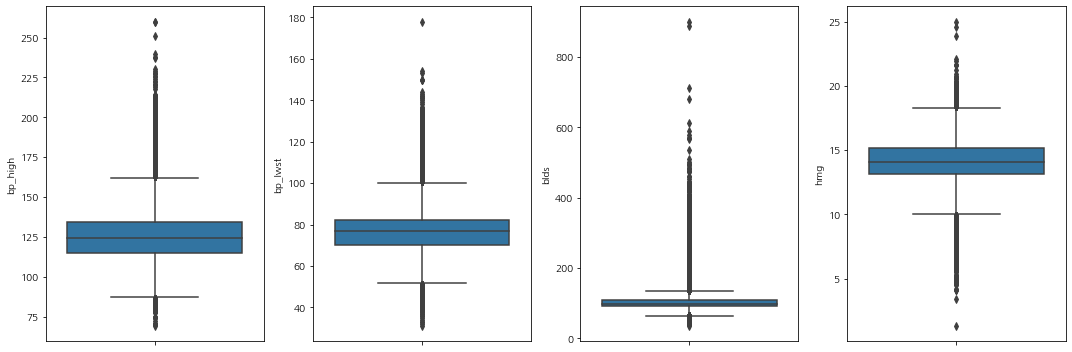

In [16]:
fig, axes = plt.subplots(1,4, figsize = (15,5))

sns.boxplot(y = new['bp_high'], ax = axes[0])
sns.boxplot(y = new['bp_lwst'], ax = axes[1])
sns.boxplot(y = new['blds'], ax = axes[2])
sns.boxplot(y = new['hmg'], ax = axes[3])

plt.tight_layout()
plt.show()

In [17]:
new_df= new.copy()

In [18]:
def outlier_iqr(data, col):
    #lower(하한),upper(상한) 글로벌 변수 선언하기
    global lower,upper
    #4분위수 기준 지정하기
    q1, q3 =np.quantile(data[col],0.25),np.quantile(data[col],0.75)
    #IQR 계산하기
    iqr = q3 - q1
    #lower,upper 구분값 구하기
    lower,upper= q1 - (1.5 * iqr),q3 + (1.5 * iqr)
    print('IQR은' , round(iqr,3),'이다.')
    print('lower 기준값은' , round(lower,3),'이다.')
    print('upper 기준값은' , round(upper,3),'이다.')
    
    #1사분위수와 4사분위에 속해 있는 데이터 각각 저장하기 
    data1 = data[data[col] > upper]
    data2 = data[data[col] < lower]
    #이상값 총 개수 구하기
    return print('총 이상값 개수는',data1.shape[0]+data2.shape[0],'이다.')
#주의할점 : 이상값 함수를 적용시키기 위해서는 결측값에 적합한 처리 한 후 함수를 적용해야한다

# 모든 변수에 대한 이상값 알아보기
for col in new.columns:
    print("<<{} 변수 이상값>>".format(col))
    outlier_iqr(new, col)
    print("=" * 50)

<<sido 변수 이상값>>
IQR은 17.0 이다.
lower 기준값은 1.5 이다.
upper 기준값은 69.5 이다.
총 이상값 개수는 0 이다.
<<sex 변수 이상값>>
IQR은 1.0 이다.
lower 기준값은 -0.5 이다.
upper 기준값은 3.5 이다.
총 이상값 개수는 0 이다.
<<age_group 변수 이상값>>
IQR은 3.0 이다.
lower 기준값은 5.5 이다.
upper 기준값은 17.5 이다.
총 이상값 개수는 1696 이다.
<<height 변수 이상값>>
IQR은 10.0 이다.
lower 기준값은 140.0 이다.
upper 기준값은 180.0 이다.
총 이상값 개수는 2731 이다.
<<weight 변수 이상값>>
IQR은 15.0 이다.
lower 기준값은 32.5 이다.
upper 기준값은 92.5 이다.
총 이상값 개수는 6435 이다.
<<waist 변수 이상값>>
IQR은 12.95 이다.
lower 기준값은 55.925 이다.
upper 기준값은 107.725 이다.
총 이상값 개수는 3073 이다.
<<sight_l 변수 이상값>>
IQR은 0.3 이다.
lower 기준값은 0.25 이다.
upper 기준값은 1.45 이다.
총 이상값 개수는 45789 이다.
<<sight_r 변수 이상값>>
IQR은 0.3 이다.
lower 기준값은 0.25 이다.
upper 기준값은 1.45 이다.
총 이상값 개수는 46218 이다.
<<hear_l 변수 이상값>>
IQR은 0.0 이다.
lower 기준값은 1.0 이다.
upper 기준값은 1.0 이다.
총 이상값 개수는 18444 이다.
<<hear_r 변수 이상값>>
IQR은 0.0 이다.
lower 기준값은 1.0 이다.
upper 기준값은 1.0 이다.
총 이상값 개수는 17471 이다.
<<bp_high 변수 이상값>>
IQR은 19.0 이다.
lower 기준값은 86.5 이다.
upper 기준값은 162.5 이다.
총 이상값 개수는 5166 이다.
<<bp_

In [19]:
new_df=new.copy()
# 시력에서 실명을 9.9로 표기 했는데 이를 0으로 치환
new_df['sight_l'].replace(9.9, 0, inplace=True)
new_df['sight_r'].replace(9.9, 0, inplace=True)

print("처리 전 데이터 :\n",new['sight_l'].describe())
print("=" * 50)
print("이상치 처리 후의 데이터 :\n",new_df['sight_l'].describe())
print("=" * 50)
print("처리 전 데이터 :\n",new['sight_r'].describe())
print("=" * 50)
print("이상치 처리 후의 데이터 :\n",new_df['sight_r'].describe())

처리 전 데이터 :
 count    392039.000000
mean          0.925994
std           0.647455
min           0.100000
25%           0.700000
50%           0.900000
75%           1.000000
max           9.900000
Name: sight_l, dtype: float64
이상치 처리 후의 데이터 :
 count    392039.000000
mean          0.887635
std           0.330174
min           0.000000
25%           0.700000
50%           0.900000
75%           1.000000
max           2.500000
Name: sight_l, dtype: float64
처리 전 데이터 :
 count    392039.000000
mean          0.928750
std           0.661089
min           0.100000
25%           0.700000
50%           0.900000
75%           1.000000
max           9.900000
Name: sight_r, dtype: float64
이상치 처리 후의 데이터 :
 count    392039.000000
mean          0.888093
std           0.329247
min           0.000000
25%           0.700000
50%           0.900000
75%           1.000000
max           2.500000
Name: sight_r, dtype: float64


In [20]:
# 청력에서 1(정상), 2(비정상)이다. 
# 하지만 데이터에 3이라는 수치가 있는데 이를 1(정상)으로 치환
new_df['hear_l'].replace(3, 1, inplace=True)
new_df['hear_r'].replace(3, 1, inplace=True)

print("처리 전 데이터 :\n",new['hear_l'].describe())
print("=" * 50)
print("이상치 처리 후의 데이터 :\n",new_df['hear_l'].describe())
print("=" * 50)
print("처리 전 데이터 :\n",new['hear_r'].describe())
print("=" * 50)
print("이상치 처리 후의 데이터 :\n",new_df['hear_r'].describe())

처리 전 데이터 :
 count    392039.000000
mean          1.048778
std           0.223300
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: hear_l, dtype: float64
이상치 처리 후의 데이터 :
 count    392039.000000
mean          1.045314
std           0.207993
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: hear_l, dtype: float64
처리 전 데이터 :
 count    392039.000000
mean          1.046202
std           0.217584
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: hear_r, dtype: float64
이상치 처리 후의 데이터 :
 count    392039.000000
mean          1.042927
std           0.202692
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: hear_r, dtype: float64


In [21]:
col = new_df[['waist',  'bp_high', 'bp_lwst', 'blds', 'tot_chole', 'trigliserida', 'hdl', 'ldl','hmg', 'creatine','sqot_ast', 'srpt_alt', 'g_gpt']]

for c in col:
    # Calculate IQR
    q1 = new_df[c].quantile(0.25)
    q3 = new_df[c].quantile(0.75)
    iqr = q3 - q1

    # Detect outliers and replace with median
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    new_df[c] = np.where((new_df[c] < lower) | (new_df[c] > upper), new_df[c].median(), new_df[c])
    
    print(f'######{c}######----------')
    print("처리 전 데이터 :\n",new[c].describe())
    print("이상치 처리 후의 데이터 :\n",new_df[c].describe())
    print("=" * 50)

######waist######----------
처리 전 데이터 :
 count    392039.000000
mean         82.135750
std           9.768046
min           8.700000
25%          75.350000
50%          82.000000
75%          88.300000
max         999.000000
Name: waist, dtype: float64
이상치 처리 후의 데이터 :
 count    392039.000000
mean         81.922036
std           9.220655
min          56.000000
25%          75.500000
50%          82.000000
75%          88.000000
max         107.700000
Name: waist, dtype: float64
######bp_high######----------
처리 전 데이터 :
 count    392039.000000
mean        124.707287
std          14.852837
min          69.000000
25%         115.000000
50%         124.000000
75%         134.000000
max         260.000000
Name: bp_high, dtype: float64
이상치 처리 후의 데이터 :
 count    392039.000000
mean        124.155071
std          13.776853
min          87.000000
25%         115.000000
50%         124.000000
75%         133.000000
max         162.000000
Name: bp_high, dtype: float64
######bp_lwst######----------
처리

In [22]:
new_df.describe()

,sido,sex,age_group,height,weight,waist,sight_l,sight_r,hear_l,hear_r,...,hdl,ldl,hmg,orig_prote_cd,creatine,sqot_ast,srpt_alt,g_gpt,smk,drk
count,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,...,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000,392039.000000
mean,33.877821,1.515803,11.944615,160.613281,62.587459,81.922036,0.887635,0.888093,1.045314,1.042927,...,56.079609,114.934700,14.193831,1.125375,0.830104,24.655723,22.222930,25.599721,1.523096,0.569961
std,12.563262,0.499751,2.281994,9.191165,12.210184,9.220655,0.330174,0.329247,0.207993,0.202692,...,13.157850,35.866367,1.443993,0.498186,0.194742,6.652988,9.272434,13.343704,0.767191,0.495082
min,11.000000,1.000000,9.000000,130.000000,30.000000,56.000000,0.000000,0.000000,1.000000,1.000000,...,18.000000,15.000000,10.000000,1.000000,0.300000,5.000000,1.000000,1.000000,1.000000,0.000000
25%,27.000000,1.000000,10.000000,155.000000,55.000000,75.500000,0.700000,0.700000,1.000000,1.000000,...,46.000000,90.000000,13.200000,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000
50%,41.000000,2.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,1.000000,...,55.000000,115.000000,14.100000,1.000000,0.800000,24.000000,21.000000,23.000000,1.000000,1.000000
75%,44.000000,2.000000,13.000000,165.000000,70.000000,88.000000,1.000000,1.000000,1.000000,1.000000,...,65.000000,139.000000,15.200000,1.000000,1.000000,28.000000,27.000000,31.000000,2.000000,1.000000
max,49.000000,2.000000,18.000000,195.000000,135.000000,107.700000,2.500000,2.500000,2.000000,2.000000,...,93.000000,215.000000,18.300000,6.000000,1.400000,45.000000,51.000000,71.000000,3.000000,1.000000


# 나. 상관관계

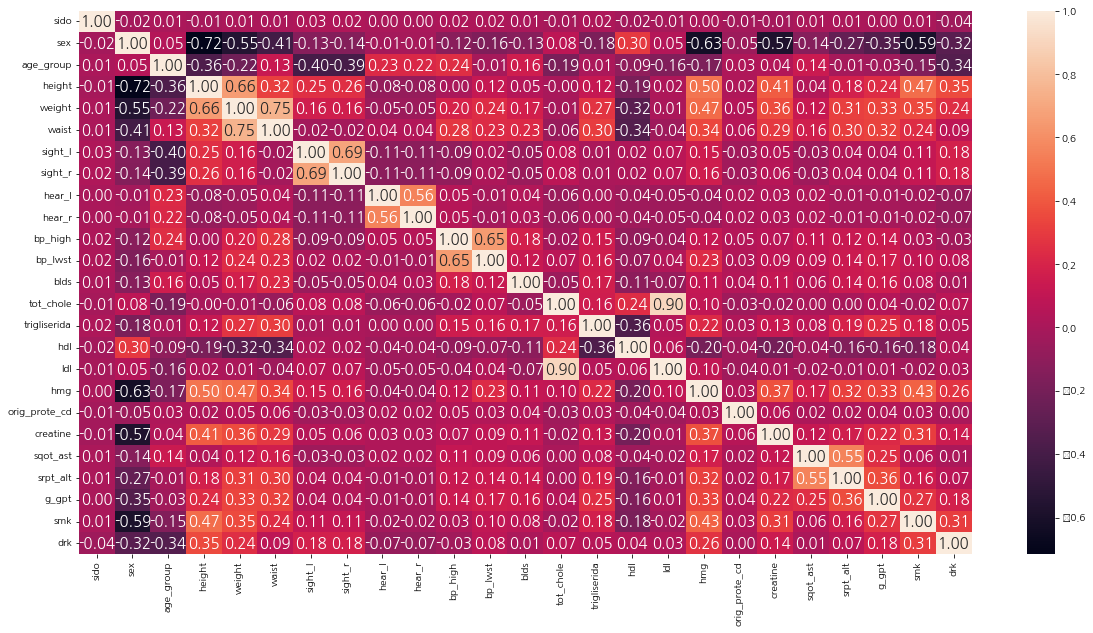

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(new_df.corr(), annot = True,fmt=".2f",annot_kws={"size": 15})
plt.show()

In [24]:
#혈색소수치와 여러독립변수들의 상관관계
new_df.corr().sort_values('hmg',ascending=False)[['hmg']]

,hmg
hmg,1.000000
height,0.503361
weight,0.466241
smk,0.432409
creatine,0.374754
waist,0.342531
g_gpt,0.334154
srpt_alt,0.317484
drk,0.263558
bp_lwst,0.232882


- 음의 상관관계: 혈색소수치와 "sex", "hdl", "age_group", "hear_r", "hear_l"입니다. 이는 해당 변수들이 증가할 때 혈색소수치는 감소하는 경향을 보인다는 것을 의미

- 양의 상관관계: 혈색소수치와 "orig_prote_cd", "tot_chole", "ldl", "blds", "bp_high", "sight_l", "sight_r", "sqot_ast", "trigliserida", "bp_lwst", "drk", "srpt_alt", "g_gpt", "waist", "creatine", "smk", "weight", "height"입니다. 이는 해당 변수들이 증가할 때 "hmg"도 증가하는 경향을 보인다는 것을 의미

- 혈색소 수치는 키,몸무게,흡연,혈청크레아티닌,허리,감마지피티(간),성별순으로 상관관계가 높다고 할 수 있다.

### 혈색소 수치는 남성의 경우 13-16.6g/dL, 여성은 12-15.5g/dL가 정상이다.

In [25]:
# 성별에 따른 혈색소 수치 평균
sex_mean=new_df.groupby('sex')['hmg'].mean()
# 흡연여부에 따른 혈색소 수치 평균
smk_mean=new_df.groupby('smk')['hmg'].mean()
# 음주여부에 따른 혈색소 수치 평균
drk_mean=new_df.groupby('drk')['hmg'].mean()

print("성별에 따른 혈색소 수치 평균", sex_mean)
print("\n흡연여부에 따른 혈색소 수치 평균", smk_mean)
print("\n음주여부에 따른 혈색소 수치 평균", drk_mean)

성별에 따른 혈색소 수치 평균 sex
1    15.129788
2    13.315226
Name: hmg, dtype: float64

흡연여부에 따른 혈색소 수치 평균 smk
1.0    13.716004
2.0    14.948062
3.0    15.197223
Name: hmg, dtype: float64

음주여부에 따른 혈색소 수치 평균 drk
0.0    13.755695
1.0    14.524407
Name: hmg, dtype: float64


           25%   50%   75%    count   max       mean   min       std
sido sex                                                            
11   1    14.4  15.2  15.9  31626.0  18.3  15.139158  10.0  1.173229
     2    12.7  13.4  14.0  36117.0  17.8  13.359462  10.0  1.019250
26   1    14.3  15.1  15.9  12693.0  18.3  15.073481  10.0  1.237361
     2    12.7  13.3  14.0  14169.0  18.3  13.283245  10.0  1.023758
27   1    14.3  15.1  15.8   9062.0  18.3  15.034121  10.0  1.228878
     2    12.6  13.2  13.9  10170.0  17.5  13.202104  10.0  1.033872
28   1    14.5  15.2  16.0  10739.0  18.3  15.204107  10.0  1.174823
     2    12.8  13.4  14.1  11405.0  18.3  13.373687  10.0  1.028365
29   1    14.5  15.2  16.0   5393.0  18.3  15.183460  10.0  1.190715
     2    12.6  13.3  13.9   5735.0  17.5  13.247986  10.0  1.022988
30   1    14.4  15.1  15.9   5714.0  18.3  15.109625  10.1  1.192635
     2    12.6  13.3  14.0   6158.0  17.6  13.269032  10.0  1.060553
31   1    14.3  15.1  15.8   5015.

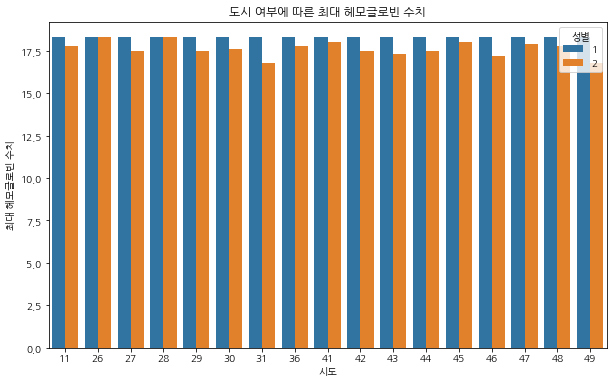

In [26]:
# 피벗 테이블 생성
pivot_table = pd.pivot_table(new_df, index=["sido", "sex"], values="hmg", aggfunc="describe")
print(pivot_table)
# 멀티인덱스를 단일 인덱스로 변환
pivot_table = pivot_table.reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table, x="sido", y="max", hue="sex")
plt.title("도시 여부에 따른 최대 헤모글로빈 수치")
plt.xlabel("시도")
plt.ylabel("최대 헤모글로빈 수치")
plt.legend(title="성별")
plt.show()

- 11 서울특별시 26 부산광역시27 대구광역시28 인천광역시29 광주광역시30 대전광역시 31 울산광역시36 세종특별자치시
41경기도 42 강원도 43 충청북도 44 충청남도 45 전라북도 46 전라남도 47 경상북도 48 경상남도 49 제주특별자치도

- 고지대는 대부분 우리 나라의 북부지방에 위치, 경기도, 강원도, 충청북도, 경상북도 등으로 대한민국의 주요 도시인 서울, 인천, 강릉, 청주, 대전, 대구, 부산 등을 포함하고 있습니다.

-11(서울특별시)남15.1392,여13.360,26(부산광역시)남자15.073,13.283 , 41(경기도)15.211,여자13.367, 43(충청북도)남자 15.153 ,여자13.347혈색소 수치가 높다.

In [27]:
pd.pivot_table(new_df, index=["smk", "sex"], values="hmg", aggfunc="describe")

25%   50%   75%     count   max       mean   min       std
smk sex                                                             
1.0 1    14.3  15.1  15.8   61873.0  18.3  14.993631  10.0  1.232920
    2    12.7  13.3  14.0  191565.0  18.3  13.303347  10.0  1.037017
2.0 1    14.3  15.1  15.8   67746.0  18.3  15.049786  10.0  1.184567
    2    12.7  13.4  14.1    4382.0  17.5  13.375399  10.0  1.079513
3.0 1    14.6  15.4  16.1   60205.0  18.3  15.359741  10.0  1.166627
    2    13.0  13.7  14.3    6268.0  17.8  13.636216  10.0  1.089539

<Axes: title={'center': '연령대별로 성별에 따른 혈색소 수치'}, xlabel='age_group', ylabel='hmg'>

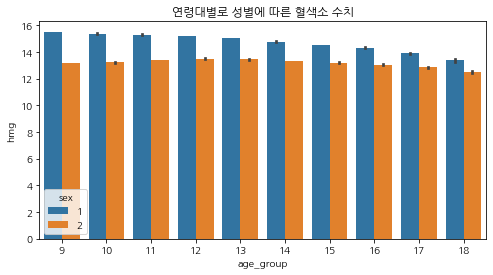

In [28]:
#연령대별로 성별에따른 헤모글로빈수치 차이
plt.figure(figsize=(8,4))
plt.title('연령대별로 성별에 따른 혈색소 수치')
sns.barplot(data=new_df, x='age_group', y='hmg', hue='sex')

<Axes: title={'center': '연령대별로 흡연여부에 따른 혈색소 수치'}, xlabel='age_group', ylabel='hmg'>

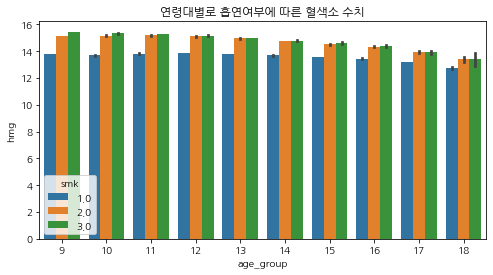

In [29]:
#연령대별로 흡연여부에따른 헤모글로빈수치 차이
plt.figure(figsize=(8,4))
plt.title('연령대별로 흡연여부에 따른 혈색소 수치')
sns.barplot(data=new_df, x='age_group', y='hmg', hue='smk')

<Axes: title={'center': '연령대별로 음주여부에 따른 혈색소 수치'}, xlabel='age_group', ylabel='hmg'>

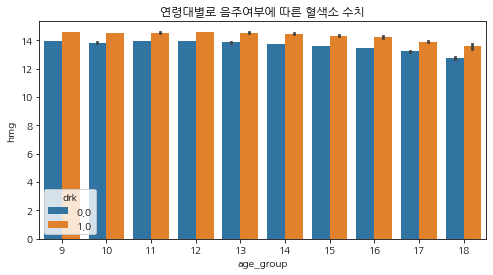

In [30]:
#연령대별로 음주여부에따른 헤모글로빈수치 차이
plt.figure(figsize=(8,4))
plt.title('연령대별로 음주여부에 따른 혈색소 수치')
sns.barplot(data=new_df, x='age_group', y='hmg', hue='drk')

<Axes: title={'center': '시도에 따른 혈색소 수치'}, xlabel='sido', ylabel='hmg'>

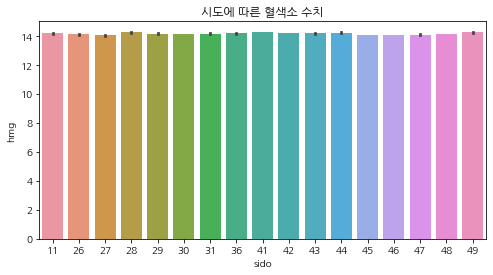

In [31]:
#도시여부에 따른 헤모글로빈수치 차이
plt.figure(figsize=(8,4))
plt.title('시도에 따른 혈색소 수치')
sns.barplot(data=new_df, x='sido', y='hmg')

### 독립표본 t-검정(Independent Samples t-test)
두 개의 독립적인 표본으로부터 얻은 평균 값이 유의하게 차이가 있는지 검정하는 통계적 방법입니다

In [32]:
#독립표본 t-검정
from scipy import stats
from scipy.stats import ttest_ind, f_oneway#T_test
no_smoke = new_df[new_df["smk"] == 1]["hmg"].values
occasional_smoke = new_df[new_df["smk"] == 2]["hmg"].values
daily_smoke = new_df[new_df["smk"] == 3]["hmg"].values

# equal_var=False로 설정하여 Welch's t-test 수행
t, p = stats.ttest_ind(no_smoke, occasional_smoke, equal_var=False)
print("Non-smoker vs. occasional smoker: t-value = %.3f, p-value = %.3f" % (t, p))

t, p = stats.ttest_ind(no_smoke, daily_smoke, equal_var=False)
print("Non-smoker vs. daily smoker: t-value = %.3f, p-value = %.3f" % (t, p))

t, p = stats.ttest_ind(occasional_smoke, daily_smoke, equal_var=False)
print("Occasional smoker vs. daily smoker: t-value = %.3f, p-value = %.3f" % (t, p))

Non-smoker vs. occasional smoker: t-value = -231.913, p-value = 0.000
Non-smoker vs. daily smoker: t-value = -266.914, p-value = 0.000
Occasional smoker vs. daily smoker: t-value = -36.932, p-value = 0.000


- p-value가 0.05보다 작기 때문에, 귀무가설을 기각하고 대립가설을 채택합니다. 따라서 흡연 여부에 따라 헤모글로빈 수치가 다르다고 할 수 있습니다

- occasional 그룹의 평균 헤모글로빈 수치가 daily smoker 그룹보다 높으며, non-smoker 그룹의 평균 헤모글로빈 수치가 occasional smoker 그룹보다 더 높다는 것을 알 수 있습니다. 이를 통해 흡연 빈도가 증가할수록 헤모글로빈 수치가 높아진다는 것을 추론할 수 있습니다.즉, 일반 흡연자와 비흡연자 사이에 차이가 더 크게 나타납니다.

### 다원배치 분산분석(Multi-way ANOVA)
두 개 이상의 독립 변수(factor)를 가지고 있는 경우에 사용되는 분석 방법, 이를 통해 여러 요인이 종속 변수에 미치는 영향과 요인들 간 상호작용 효과를 동시에 검정할 수 있습니다.

In [33]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392039 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sido           392039 non-null  int64  
 1   sex            392039 non-null  int64  
 2   age_group      392039 non-null  int64  
 3   height         392039 non-null  int64  
 4   weight         392039 non-null  int64  
 5   waist          392039 non-null  float64
 6   sight_l        392039 non-null  float64
 7   sight_r        392039 non-null  float64
 8   hear_l         392039 non-null  float64
 9   hear_r         392039 non-null  float64
 10  bp_high        392039 non-null  float64
 11  bp_lwst        392039 non-null  float64
 12  blds           392039 non-null  float64
 13  tot_chole      392039 non-null  float64
 14  trigliserida   392039 non-null  float64
 15  hdl            392039 non-null  float64
 16  ldl            392039 non-null  float64
 17  hmg            392039 non-nul

In [34]:
#다원분산분석 방법
import statsmodels.api as sm
from statsmodels.formula.api import ols

# hmg을 종속변수로, 모든 독립변수를 모델에 포함시킨 분산분석 실행
model = ols('hmg ~ sex + sido + age_group + height + weight + waist + sight_l + sight_r + hear_l + hear_r + bp_high + bp_lwst + blds + tot_chole + trigliserida + hdl + ldl + orig_prote_cd + creatine + sqot_ast + srpt_alt + g_gpt + smk + drk', data=new_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)# ANOVA 테이블 생성

# 결과 출력
print(anova_table.round(5))

                     sum_sq        df            F   PR(>F)
sex             52083.75103       1.0  47896.86105  0.00000
sido               42.30144       1.0     38.90092  0.00000
age_group        3648.79592       1.0   3355.47781  0.00000
height             11.73902       1.0     10.79535  0.00102
weight            330.97928       1.0    304.37264  0.00000
waist             245.62583       1.0    225.88055  0.00000
sight_l            38.87904       1.0     35.75365  0.00000
sight_r            76.96698       1.0     70.77979  0.00000
hear_l             33.25344       1.0     30.58028  0.00000
hear_r             28.95033       1.0     26.62308  0.00000
bp_high           409.78644       1.0    376.84467  0.00000
bp_lwst          5272.20487       1.0   4848.38475  0.00000
blds              169.73523       1.0    156.09061  0.00000
tot_chole         652.93019       1.0    600.44268  0.00000
trigliserida      800.94627       1.0    736.56008  0.00000
hdl                15.67094       1.0   

- 위의 다원 분산 분석 결과를 보면, PR(>F) 열에서 orig_prote_cd(단백뇨)수치를 제외한  모든 변수들이 0.05보다 작은 값을 가지고 있어, 모든 독립변수가 종속변수에 통계적으로 유의미한 영향을 미치는 것으로 나타났습니다.

- 즉, 이 다원 분산 분석 결과는 적어도 하나의 독립변수와 종속변수 사이에 통계적으로 유의한 관계가 있다는 것을 나타내며, 다른 독립변수들도 각각 종속변수에 대한 통계적인 유의미성을 가지고 있음을 보여줍니다.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score

def get_rmse(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    return rmse, r2

# 독립변수와 종속변수 분리
X = new_df.drop('hmg', axis=1)
y = new_df['hmg']

# 학습 데이터셋과 검증 데이터셋 분리 (7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('훈련 데이터:', X_train.shape)
print('검증 데이터:', X_test.shape)

# 회귀 모델 학습
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

models = [ridge, lasso, lgbm, xgb]
for model in models:
    rmse, r2 = get_rmse(model, X_test, y_test)
    print(f"Model: {type(model).__name__}") 
    print("RMSE:", round(rmse,5))
    print("R-squared:", round(r2,5))
    print("---")

훈련 데이터: (274427, 24)
검증 데이터: (117612, 24)
Model: Ridge
RMSE: 1.04215
R-squared: 0.47719
---
Model: Lasso
RMSE: 1.04334
R-squared: 0.47599
---
Model: LGBMRegressor
RMSE: 1.01491
R-squared: 0.50416
---
Model: XGBRegressor
RMSE: 1.01841
R-squared: 0.50073
---


### 라-1. 선형 회귀분석 모델링

In [36]:
# 독립변수와 종속변수 분리
X = new_df.drop('hmg', axis=1,inplace=False)
y = new_df['hmg']


# 학습 데이터셋과 검증 데이터셋 분리train data와 test data로 구분 7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('훈련 데이터: ', X_train.shape)
print('검증 데이터:', X_test.shape)


# 회귀 모델 학습
model = LinearRegression()

# X_train 훈련시키기
model.fit(X_train, y_train)

# 검증용 데이터를 사용하여 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", round(mse,5),"\nRMSE:", round(rmse,5))
print("R-squared:", round(r2,5))


# 회귀 계수 확인
coef = pd.DataFrame(model.coef_, columns=['coef'], index=X_train.columns)
print(round(coef,4))

훈련 데이터:  (274427, 24)
검증 데이터: (117612, 24)
Mean Squared Error:  1.08608 
RMSE: 1.04215
R-squared: 0.47719
                 coef
sido          -0.0010
sex           -1.3851
age_group     -0.0608
height        -0.0011
weight         0.0052
waist          0.0047
sight_l        0.0422
sight_r        0.0651
hear_l        -0.0565
hear_r        -0.0459
bp_high       -0.0033
bp_lwst        0.0168
blds           0.0018
tot_chole      0.0032
trigliserida   0.0011
hdl           -0.0008
ldl            0.0009
orig_prote_cd  0.0011
creatine       0.1467
sqot_ast       0.0062
srpt_alt       0.0153
g_gpt          0.0052
smk            0.1056
drk            0.0257


- MSE는 종속변수인 혈색소수치의 실제값과 모델이 예측한 값의 차이를 제곱한 후 평균을 구한 값으로, 작을수록 모델이 실제값과 가깝게 예측하는 것입니다. MSE는 1.0861이며, 평균적으로 예측값과 실제값의 차이가 약 1.086 정도로 나타난다고 해석할 수 있습니다.
- R2는 모델이 종속변수의 변동량 중에서 설명할 수 있는 비율을 나타내며, 1에 가까울수록 모델이 종속변수를 잘 설명하는 것입니다.R-squared는 0.4772로, 설명력이 약 47.7% 정도라고 해석할 수 있습니다.
- 해당 모델의 MSE가 약 1.086로 상대적으로 크고 R2가 0.477으로 낮은 편이므로, 모델이 혈색소수치를 설명하는 데에는 한계가 있을 수 있다는 것을 시사합니다.



### 라-2. 스케일링

In [37]:
#평균이 0, 분산이 1인 정규분포형태로 만들어줌,표준화
# 독립변수와 종속변수 분리
X = new_df.drop('hmg', axis=1)
y = new_df['hmg']

from sklearn.preprocessing import StandardScaler
# 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 학습 데이터셋과 검증 데이터셋 분리train data와 test data로 구분 7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('훈련 데이터: ', X_train.shape)
print('검증 데이터:', X_test.shape)

# 회귀 모델 학습
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# 모델 평가
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", round(mse,5),"\nRMSE:", round(rmse,5))
print("R-squared:", round(r2,5))




훈련 데이터:  (274427, 24)
검증 데이터: (117612, 24)
Mean Squared Error:  1.08608 
RMSE: 1.04215
R-squared: 0.47719


In [38]:
#최솟값은 0이 되고, 최댓값은 1
# 독립변수와 종속변수 분리
X = new_df.drop('hmg', axis=1)
y = new_df['hmg']

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

# 학습 데이터셋과 검증 데이터셋 분리 (7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print('훈련 데이터:', X_train.shape)
print('검증 데이터:', X_test.shape)

# 회귀 모델 학습
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# 모델 평가
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", round(mse,5))
print("R-squared:", round(r2,5))



훈련 데이터: (274427, 24)
검증 데이터: (117612, 24)
Mean Squared Error:  1.08608
R-squared: 0.47719


- 스케일링을 해도 성능이 좋아지지 않음

## 마. 랜덤포레스트 모델링

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 독립변수와 종속변수 분리
X = new_df.drop('hmg', axis=1,inplace=False)
y = new_df['hmg']

# 학습 데이터셋과 검증 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤포레스트 모델 학습
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#예측
y_pred = rf.predict(X_test)
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", round(mse,5),"\nRMSE:", round(rmse,5))
print("R-squared:", round(r2,5))

#변수 중요도 확인
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

Mean Squared Error:  1.05666 
RMSE: 1.02794
R-squared: 0.49135
               importance
sex              0.395148
srpt_alt         0.048781
tot_chole        0.047442
age_group        0.045601
trigliserida     0.042811
blds             0.036612
ldl              0.036478
hdl              0.036438
waist            0.036238
bp_lwst          0.035153
bp_high          0.034693
g_gpt            0.034275
sqot_ast         0.030528
sido             0.022983
creatine         0.020956
sight_l          0.020477
sight_r          0.020446
weight           0.018216
height           0.014726
orig_prote_cd    0.007701
smk              0.006580
drk              0.004533
hear_r           0.001650
hear_l           0.001534


- 해당 랜덤 포레스트 회귀분석 결과에 따르면, 독립변수 중 'sex'와 'blds'가 종속변수인 혈색소 수치와 가장 큰 영향을 미치는 것으로 나타났습니다. 또한, 'age_group', 'height', 'weight', 'smk', 'orig_prote_cd', 'drk' 순으로 영향력이 큰 것으로 나타났으며, 'trigliserida'는 종속변수에 대한 영향력이 거의 없다는 것을 알 수 있습니다.

- 모델의 평가 지표로는 Mean Squared Error가 1.29이며, R-squared 값이 0.38로 나타났습니다. R-squared는 모델이 데이터를 얼마나 잘 설명하는 지를 나타내는 지표로, 0.38은 적당한 수준이 아니며, 모델의 성능을 개선해야 할 필요성이 있습니다.

# 하이퍼파라미터 적용하기

In [ ]:
from sklearn.model_selection import GridSearchCV
# 독립변수와 종속변수 분리
X = new_df.drop('hmg', axis=1,inplace=False)
y = new_df['hmg']


# 학습 데이터셋과 검증 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 탐색 범위 정의
grid_search = {'criterion': ['mse', 'mae'],
               'max_depth': [2, 4, 6, 8, 10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4, 8],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [20, 50, 100]}

# RandomForestRegressor 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid_search, cv=4, n_jobs=-1, verbose=5)
grid_search.fit(X_train, y_train)

# 최적 모델 추출 및 검증
best_model = grid_search.best_estimator_
best_model_predictions = best_model.predict(X_test)
r2 = r2_score(y_test, best_model_predictions)

# 결과 출력
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Test set R2: ", r2)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits
